<h1>James Perez</h1>
<h2>Data Analysis / Visualization Example - Vero vs Longmont</h2>

This purpose of this example is to demonstrate a competency in cleaning, analyzing, manipulating, and vizualzing data with the help of pandas, matplotlib, seaborn, jupyter notebook, and weather data from meteostat.net

In [156]:
##Import libraries, API call, json to pandas##

#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

#API variables
start = ("2021-01-01")
end = ("2021-12-31")
vero_beach_station = ("KVRB0")
longmont_station = ("KLMO0")

meteostat_endpoint = "https://meteostat.p.rapidapi.com/stations/daily"

headers = {
    "X-RapidAPI-Key": "c645c50e1bmsh686d2724b1b8f3ep1f77c9jsn04de7b7cea17",
    "X-RapidAPI-Host": "meteostat.p.rapidapi.com"
}

vero_params = {
    "station": vero_beach_station,
    "start": start,
    "end": end,
    "units": "imperial"
}

longmont_params = {
    "station": longmont_station,
    "start": start,
    "end": end,
    "units": "imperial"
}

#API calls, API to json, strip metadata
vero_beach_response = requests.get(
    url=meteostat_endpoint,
    headers=headers,
    params=vero_params
).json()["data"]

longmont_response = requests.get(
    url=meteostat_endpoint,
    headers=headers,
    params=longmont_params
).json()["data"]

#Convert json to pandas
vb = pd.DataFrame.from_dict(vero_beach_response)
lm = pd.DataFrame.from_dict(longmont_response)

#Verify
vb

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2021-01-01,75.0,71.1,82.0,0.000,None,148.0,12.8,None,1021.4,None
1,2021-01-02,73.4,68.0,81.0,0.024,None,168.0,9.7,None,1020.0,None
2,2021-01-03,70.0,64.9,81.0,0.000,None,229.0,8.8,None,1017.5,None
3,2021-01-04,59.7,48.9,69.1,0.000,None,331.0,7.1,None,1017.3,None
4,2021-01-05,55.9,43.0,70.0,0.000,None,306.0,6.1,None,1017.4,None
...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,66.7,55.9,79.0,0.000,None,353.0,3.1,None,1018.8,None
361,2021-12-28,67.8,55.0,79.0,0.000,None,313.0,3.2,None,1017.8,None
362,2021-12-29,70.5,57.9,82.0,0.000,None,206.0,5.8,None,1018.2,None
363,2021-12-30,69.6,57.0,82.0,0.000,None,256.0,4.3,None,1018.5,None


In [157]:
#Verify
lm

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2021-01-01,32.7,25.0,45.0,NaN,None,326.0,3.1,None,NaN,None
1,2021-01-02,30.7,15.8,46.6,0.000,None,320.0,3.4,None,1015.1,None
2,2021-01-03,36.7,23.7,50.4,0.000,None,349.0,4.1,None,1012.4,None
3,2021-01-04,40.3,28.6,55.9,0.000,None,311.0,5.1,None,1017.5,None
4,2021-01-05,39.2,23.2,57.9,0.000,None,286.0,6.5,None,1012.9,None
...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,32.0,18.1,43.0,0.039,None,1.0,3.4,None,1002.3,None
361,2021-12-28,30.6,16.2,38.5,0.012,None,41.0,4.9,None,999.3,None
362,2021-12-29,22.8,12.4,37.4,0.000,None,14.0,1.4,None,1004.4,None
363,2021-12-30,38.7,14.2,50.4,0.012,None,330.0,6.4,None,999.7,None


In [158]:
#Add city and concat dataframes

vb["city"] = "Vero Beach"
lm["city"] = "Longmont"

df = pd.concat([vb, lm], ignore_index=True)

In [159]:
#Verify
df

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,city
0,2021-01-01,75.0,71.1,82.0,0.000,None,148.0,12.8,None,1021.4,None,Vero Beach
1,2021-01-02,73.4,68.0,81.0,0.024,None,168.0,9.7,None,1020.0,None,Vero Beach
2,2021-01-03,70.0,64.9,81.0,0.000,None,229.0,8.8,None,1017.5,None,Vero Beach
3,2021-01-04,59.7,48.9,69.1,0.000,None,331.0,7.1,None,1017.3,None,Vero Beach
4,2021-01-05,55.9,43.0,70.0,0.000,None,306.0,6.1,None,1017.4,None,Vero Beach
...,...,...,...,...,...,...,...,...,...,...,...,...
725,2021-12-27,32.0,18.1,43.0,0.039,None,1.0,3.4,None,1002.3,None,Longmont
726,2021-12-28,30.6,16.2,38.5,0.012,None,41.0,4.9,None,999.3,None,Longmont
727,2021-12-29,22.8,12.4,37.4,0.000,None,14.0,1.4,None,1004.4,None,Longmont
728,2021-12-30,38.7,14.2,50.4,0.012,None,330.0,6.4,None,999.7,None,Longmont


In [160]:
#Verify and analyze
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    730 non-null    object 
 1   tavg    728 non-null    float64
 2   tmin    728 non-null    float64
 3   tmax    728 non-null    float64
 4   prcp    727 non-null    float64
 5   snow    0 non-null      object 
 6   wdir    728 non-null    float64
 7   wspd    728 non-null    float64
 8   wpgt    0 non-null      object 
 9   pres    727 non-null    float64
 10  tsun    0 non-null      object 
 11  city    730 non-null    object 
dtypes: float64(7), object(5)
memory usage: 68.6+ KB


In [161]:
#No dat
df["tsun"].unique()

array([None], dtype=object)

In [162]:
#No data
df["wpgt"].unique()

array([None], dtype=object)

In [163]:
#No data
df["snow"].unique()

array([None], dtype=object)

In [164]:
#Date column to DateTime, create new DT columns for easier plotting later on
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

#Verify
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    730 non-null    datetime64[ns]
 1   tavg    728 non-null    float64       
 2   tmin    728 non-null    float64       
 3   tmax    728 non-null    float64       
 4   prcp    727 non-null    float64       
 5   snow    0 non-null      object        
 6   wdir    728 non-null    float64       
 7   wspd    728 non-null    float64       
 8   wpgt    0 non-null      object        
 9   pres    727 non-null    float64       
 10  tsun    0 non-null      object        
 11  city    730 non-null    object        
 12  year    730 non-null    int64         
 13  month   730 non-null    int64         
 14  day     730 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(3), object(4)
memory usage: 85.7+ KB


In [165]:
#Drop 'no data' columns and move city column
df = df[["city", "date", "year", "month", "day", "tavg", "tmin", "tmax", "prcp", "wdir", "wspd", "pres"]]

#Verify
df

,city,date,year,month,day,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,Vero Beach,2021-01-01,2021,1,1,75.0,71.1,82.0,0.000,148.0,12.8,1021.4
1,Vero Beach,2021-01-02,2021,1,2,73.4,68.0,81.0,0.024,168.0,9.7,1020.0
2,Vero Beach,2021-01-03,2021,1,3,70.0,64.9,81.0,0.000,229.0,8.8,1017.5
3,Vero Beach,2021-01-04,2021,1,4,59.7,48.9,69.1,0.000,331.0,7.1,1017.3
4,Vero Beach,2021-01-05,2021,1,5,55.9,43.0,70.0,0.000,306.0,6.1,1017.4
...,...,...,...,...,...,...,...,...,...,...,...,...
725,Longmont,2021-12-27,2021,12,27,32.0,18.1,43.0,0.039,1.0,3.4,1002.3
726,Longmont,2021-12-28,2021,12,28,30.6,16.2,38.5,0.012,41.0,4.9,999.3
727,Longmont,2021-12-29,2021,12,29,22.8,12.4,37.4,0.000,14.0,1.4,1004.4
728,Longmont,2021-12-30,2021,12,30,38.7,14.2,50.4,0.012,330.0,6.4,999.7


In [166]:
###  DATA FRAME LEGEND  ###

# date = date
# year = year
# month = month
# day = day of month
# city = city
# tavg = average temperature
# tmin = minimum temperature
# tmax = maximum temperature
# prcp = daily precipitation total in inches
# wdir = average wind direction in degrees
# wspd = average wind speed in mph
# pres = average sea-level air pressure in hPa

###  DATA FRAME LEGEND  ###

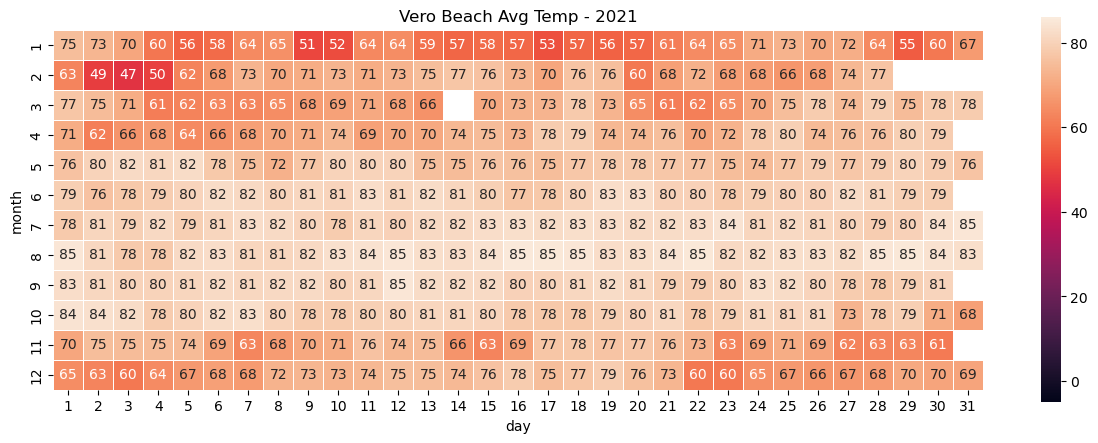

In [215]:
##Finally, we can get started##
# Does the Sunshine State live up to it's name?

vb_temp = df[df["city"] == "Vero Beach"][["month", "day", "tavg"]].pivot("month", "day", "tavg")

plt.figure(figsize=(15,5))
plt.title("Vero Beach Avg Temp - 2021")
sns.heatmap(vb_temp, annot=True, linewidths=.5, square=True, vmin=(-5),vmax=86)

plt.show()

In [168]:
# Sure Does! 
#  - Just at that warm warm heat map!
#  - 75 degree average temp
#  - Average min/max 47/85 respectively
#  - Coldest temp? 30 degrees

df[df["city"] == "Vero Beach"].describe()

,year,month,day,tavg,tmin,tmax,prcp,wdir,wspd,pres
count,365.0,365.000000,365.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,2021.0,6.526027,15.720548,74.692033,66.425549,83.465934,0.098544,162.510989,7.846703,1017.910165
std,0.0,3.452584,8.808321,7.734536,9.785331,6.811503,0.262244,109.669061,3.014074,3.364976
min,2021.0,1.000000,1.000000,47.100000,30.000000,59.000000,0.000000,0.000000,2.000000,1006.700000
25%,2021.0,4.000000,8.000000,70.200000,59.000000,79.000000,0.000000,70.000000,5.600000,1015.700000
50%,2021.0,7.000000,16.000000,77.000000,70.000000,84.900000,0.000000,142.000000,7.500000,1017.900000
75%,2021.0,10.000000,23.000000,80.800000,73.900000,89.100000,0.052000,253.750000,9.500000,1020.000000
max,2021.0,12.000000,31.000000,85.300000,82.000000,95.000000,2.374000,360.000000,18.400000,1030.400000


In [169]:
# How many days Vero Beach dip to 32 and under?
#  - Just ONE!

# How will Longmont, CO compare?

df[(df["city"] == "Vero Beach") & (df["tmin"] <= 32)]

,city,date,year,month,day,tavg,tmin,tmax,prcp,wdir,wspd,pres
34,Vero Beach,2021-02-04,2021,2,4,49.6,30.0,68.0,0.0,342.0,5.6,1019.6


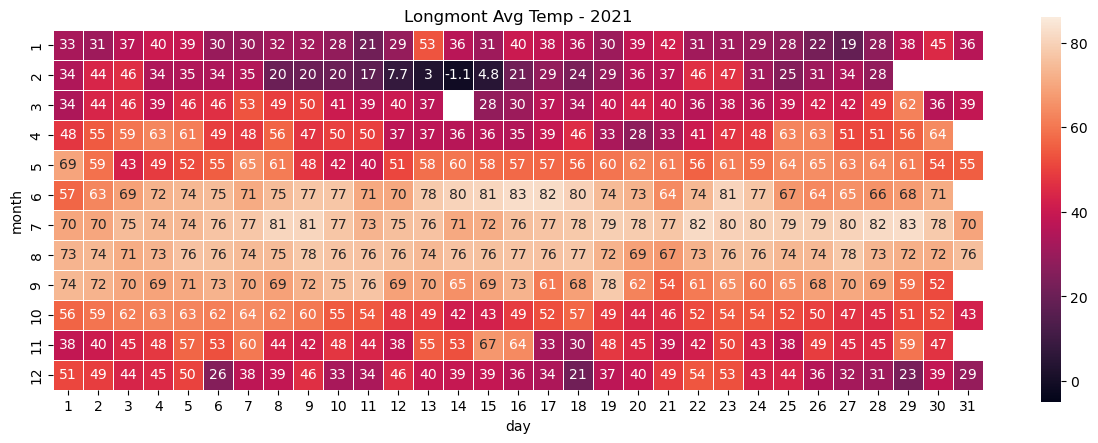

In [216]:
# Oof, it is cold in Colorado

lm_temp = df[df["city"] == "Longmont"][["month", "day", "tavg"]].pivot("month", "day", "tavg")

plt.figure(figsize=(15,5))
plt.title("Longmont Avg Temp - 2021")
sns.heatmap(lm_temp, annot=True, linewidths=.5, square=True, vmin=(-5), vmax=86)

plt.show()

In [175]:
# Longmont, CO stats
#  - 53 degree average temp
#  - Average min/max -1/83 respectively
#  - Coldest temp? -12 yikes


df[df["city"] == "Longmont"].describe()

,year,month,day,tavg,tmin,tmax,prcp,wdir,wspd,pres
count,365.0,365.000000,365.000000,364.000000,364.000000,364.000000,363.000000,364.000000,364.000000,363.000000
mean,2021.0,6.526027,15.720548,53.264835,39.046703,67.987637,0.050843,216.804945,4.204670,1017.981267
std,0.0,3.452584,8.808321,17.620057,16.403118,19.867350,0.128559,150.621515,2.311453,6.347622
min,2021.0,1.000000,1.000000,-1.100000,-11.700000,6.600000,0.000000,0.000000,0.400000,999.300000
25%,2021.0,4.000000,8.000000,39.200000,27.250000,52.200000,0.000000,27.500000,2.700000,1014.200000
50%,2021.0,7.000000,16.000000,52.250000,37.800000,69.850000,0.000000,313.500000,3.800000,1019.100000
75%,2021.0,10.000000,23.000000,70.000000,53.700000,84.800000,0.033000,345.000000,5.200000,1022.450000
max,2021.0,12.000000,31.000000,82.800000,69.600000,104.000000,1.130000,359.000000,16.900000,1037.000000


In [179]:
# 42 Freezing days

len(df[(df["city"] == "Longmont") & (df["tavg"] < 32)])

42

In [183]:
# Well, I think you can still cut grass when it's freezing, but I don't think you can when it's snowing..
# - How many days it snow in Longmont, CO?

# Trouble is, the snow depth data wasn't available.. but that won't stop me!
# I think we can infer that days under 32 degrees with precipitation were likely snow days.. let's see!

len(df[(df["city"] == "Longmont") & (df["tavg"] < 32) & (df["prcp"] > 0)])

22

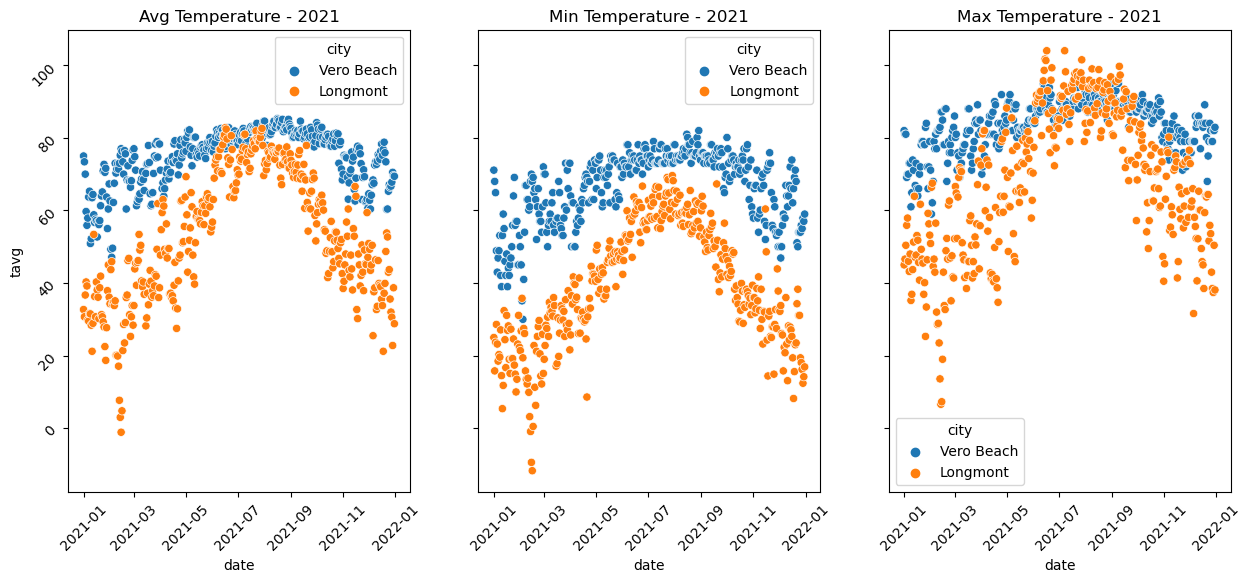

In [223]:
# Avr, Min, Max Temperature comparrisons over the course of the year

fg, ax = plt.subplots(1,3, figsize=(15,6), sharey=True)

sns.scatterplot(data=df, x="date", y="tavg", hue="city", ax=ax[0]).set_title("Avg Temperature - 2021")
ax[0].tick_params(rotation=45)

sns.scatterplot(data=df, x="date", y="tmin", hue="city", ax=ax[1]).set_title("Min Temperature - 2021")
ax[1].tick_params(rotation=45)

sns.scatterplot(data=df, x="date", y="tmax", hue="city", ax=ax[2]).set_title("Max Temperature - 2021")
ax[2].tick_params(rotation=45)

plt.show()